In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

In [3]:
IMAGE_SIZE=(320,320)

In [4]:
path=r"M:\GYM Project\Optical Flow\Myfolder\TWO FRAME\DATA"
train_set=image_dataset_from_directory(path,image_size=IMAGE_SIZE,validation_split=0.2
                                      ,seed=123,subset="training")
test_set=image_dataset_from_directory(path,image_size=IMAGE_SIZE,validation_split=0.2
                                      ,seed=123,subset="validation")

Found 848 files belonging to 3 classes.
Using 679 files for training.
Found 848 files belonging to 3 classes.
Using 169 files for validation.


['NO POSE', 'PUSH DOWN', 'PUSH UP']


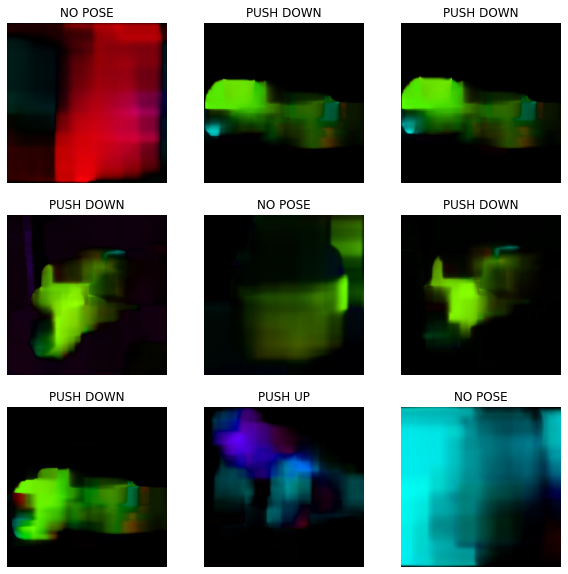

In [5]:
import matplotlib.pyplot as plt

class_names = train_set.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 320, 320, 3)
(32,)


In [12]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
#APPLY EARLY STOPPING

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [16]:
history=model.fit(train_set,validation_data=test_set,epochs=10,callbacks=[callback])

Epoch 1/10
22/22 [==============================] - 77s 4s/step - loss: 0.8342 - accuracy: 0.8321 - val_loss: 5.2600 - val_accuracy: 0.6864
Epoch 2/10
22/22 [==============================] - 81s 4s/step - loss: 0.2006 - accuracy: 0.9426 - val_loss: 4.1410 - val_accuracy: 0.6805
Epoch 3/10
22/22 [==============================] - 75s 3s/step - loss: 0.1083 - accuracy: 0.9735 - val_loss: 0.2285 - val_accuracy: 0.9527
Epoch 4/10
22/22 [==============================] - 77s 4s/step - loss: 0.0213 - accuracy: 0.9941 - val_loss: 0.4535 - val_accuracy: 0.9527
Epoch 5/10
22/22 [==============================] - 81s 4s/step - loss: 0.0414 - accuracy: 0.9882 - val_loss: 0.1600 - val_accuracy: 0.9704
Epoch 6/10
22/22 [==============================] - 76s 3s/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 0.4175 - val_accuracy: 0.9290
Epoch 7/10
22/22 [==============================] - 88s 4s/step - loss: 0.0100 - accuracy: 0.9941 - val_loss: 0.2640 - val_accuracy: 0.9527
Epoch 8/10
22/22 [==

In [17]:
model.evaluate(test_set)

6/6 [==============================] - 6s 900ms/step - loss: 0.2704 - accuracy: 0.9704


[0.2704349458217621, 0.9704142212867737]

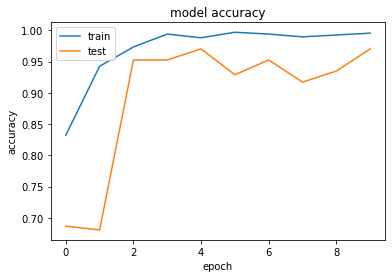

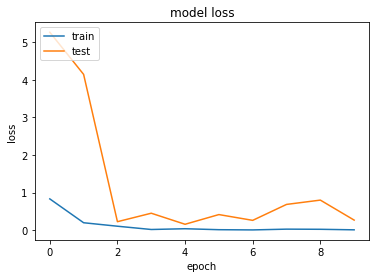

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save("OpticalFlow_Conv2D_Version2.h5")